In [41]:
import cv2 as cv
import mediapipe as mp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
mp_pose = mp.solutions.pose
mp_draw = mp.solutions.drawing_utils

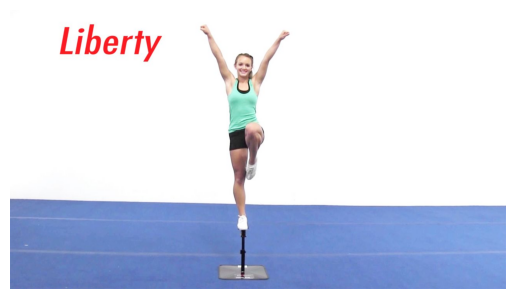

In [9]:
image = cv.imread('./lib1.jpg')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

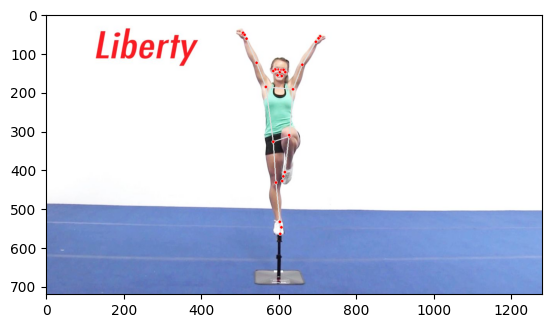

In [13]:
cap = cv.VideoCapture(0)
image = cv.imread('./lib1.jpg')
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    # Convert color to pose detection
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Pose detection
    results = pose.process(image)

    # Convert color to BGR
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    image.flags.writeable = True

    # Render joints and lines
    mp_draw.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))

In [36]:
def calculateAngles(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180/np.pi)

    if angle > 180:
        angle = 360 - angle
    return angle

In [48]:
landmarks = results.pose_landmarks.landmark
interested_joints = ['NOSE']

# Get right body features
r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].y] 
r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE].y] 
r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y] 
r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y] 
r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].y] 
r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].y] 

# Get left body features
l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y]
l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y]
l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y]
l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y]
l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y]
l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST].y]

In [49]:
# Get right body angles features
r_knee_angle = calculateAngles(r_ankle, r_knee, r_hip)
r_hip_angle = calculateAngles(r_knee, r_hip, r_shoulder)
r_shoulder_angle = calculateAngles(r_hip, r_shoulder, r_elbow)
r_elbow_angle = calculateAngles(r_shoulder, r_elbow, r_wrist)

# Get left body angles features
l_knee_angle = calculateAngles(l_ankle, l_knee, l_hip)
l_hip_angle = calculateAngles(l_knee, l_hip, l_shoulder)
l_shoulder_angle = calculateAngles(l_hip, l_shoulder, l_elbow)
l_elbow_angle = calculateAngles(l_shoulder, l_elbow, l_wrist)

In [50]:
columns = ['r_knee_angle', 'r_hip_angle', 'r_shoulder_angle', 'r_elbow_angle', 'l_knee_angle', 'l_hip_angle', 'l_shoulder_angle', 'l_elbow_angle']
data = [[r_knee_angle, r_hip_angle, r_shoulder_angle, r_elbow_angle, l_knee_angle, l_hip_angle, l_shoulder_angle, l_elbow_angle]]
df = pd.DataFrame(data=data, columns=columns)
df

,r_knee_angle,r_hip_angle,r_shoulder_angle,r_elbow_angle,l_knee_angle,l_hip_angle,l_shoulder_angle,l_elbow_angle
0,178.606352,177.61685,171.967288,179.221895,13.983919,12.350562,170.15256,173.722076
